# K-Fold Cross Validation

Please refer to the following documentation from Scikit-Learn to understand the concepts related with K-Fold Cross Validation.

Reference: https://isheunesu48.medium.com/cross-validation-using-k-fold-with-scikit-learn-cfc44bf1ce6#:~:text=Lets%20take%20the%20scenario%20of,serve%20as%20the%20training%20set.

In this lab we are going to implement a SVC model using k-fold cross validation.

The Iris Dataset that available in Scikit-Learn Datasets will be utilized during this task.

Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris



In [21]:
from importlib import import_module

# Load the necessary libraries

from sklearn import datasets
# Your code here
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import svm

In [2]:
# Load the dataset

# Your code here
iris = datasets.load_iris()

In [3]:
# Print the data columns

# Your code here
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# Print the target column

# Your code here
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# Print the model feature names

# Your code here
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Print the target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

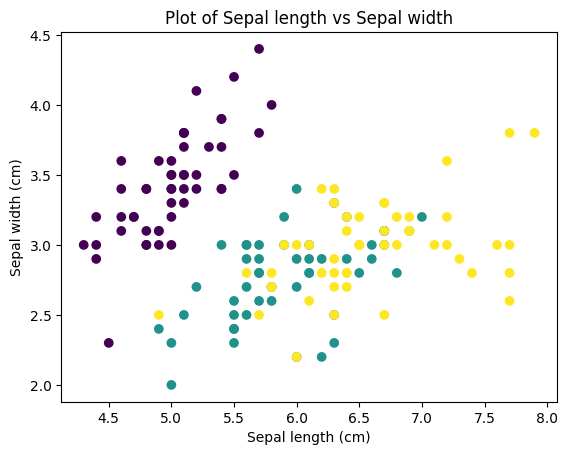

In [9]:
# Select two features from the above features and plot the dataset in the 2D space using matplotlib scatter-plots

# Your code here
import matplotlib.pyplot as plt

plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Plot of Sepal length vs Sepal width');  # Put a semicolon at the end to print the plot only


In [10]:
# Separate the features and target from the dataset.
# Name them as X and y respectively

# Your code here
X = iris.data
y = iris.target

In [11]:
# Display the shape of the feature set and target

# Your code here
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [12]:
# Split the data into train and test sets

# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Print the train and test set sizes

# Your code here
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [20]:
# Scale the data using scikit-learn standard scaler

# Your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Define SVC Classifier with default parameters

# Your code here
clf = svm.SVC()

In [25]:
# Estimate the accuracy of the model with k-fold cross validation.
# Use 'cross_val_score' function provided with scikit-learn to obtain the accuracy for each split
# use k = 5
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
# Your code here

In [26]:
# Print the calculated scores

# Your code here
print(scores)

[0.95833333 1.         0.83333333 1.         0.95833333]


In [27]:
# Calculate the mean and standard deviation of the accuracy scores obtained via k-fold cross validation
# Use numpy functions

# Your code here
print(f'Mean Accuracy: {np.mean(scores)}')
print(f'Standard Deviation of Accuracy: {np.std(scores)}')

Mean Accuracy: 0.95
Standard Deviation of Accuracy: 0.06123724356957944


In [28]:
# Fit the model once again with whole training dataset without cross validation.
# Test the model performance with test set
clf.fit(X_train_scaled, y_train)
# Your code here

SVC()

In [29]:
# Print the model accuracy on test set
print(f'Train Accuracy: {clf.score(X_train_scaled, y_train)}')
print(f'Test Accuracy: {clf.score(X_test_scaled, y_test)}')

Train Accuracy: 0.9666666666666667
Test Accuracy: 1.0
